In [1]:
%matplotlib inline

In [2]:
import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import scipy.special
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context('notebook')

Spider data from _Suzuki et al. (2006)_

In [3]:
data = """Grain size (mm)	Spiders
0.245	absent
0.247	absent
0.285	present
0.299	present
0.327	present
0.347	present
0.356	absent
0.36	present
0.363	absent
0.364	present
0.398	absent
0.4	present
0.409	absent
0.421	present
0.432	absent
0.473	present
0.509	present
0.529	present
0.561	absent
0.569	absent
0.594	present
0.638	present
0.656	present
0.816	present
0.853	present
0.938	present
1.036	present
1.045	present
"""


In [4]:
df = pd.read_table(io.StringIO(data))
df.Spiders

0      absent
1      absent
2     present
3     present
4     present
5     present
6      absent
7     present
8      absent
9     present
10     absent
11    present
12     absent
13    present
14     absent
15    present
16    present
17    present
18     absent
19     absent
20    present
21    present
22    present
23    present
24    present
25    present
26    present
27    present
Name: Spiders, dtype: object

In [5]:
df.Spiders = df.Spiders == 'present'
df.head()

,Grain size (mm),Spiders
0,0.245,False
1,0.247,False
2,0.285,True
3,0.299,True
4,0.327,True


In [6]:
df.Spiders

0     False
1     False
2      True
3      True
4      True
5      True
6     False
7      True
8     False
9      True
10    False
11     True
12    False
13     True
14    False
15     True
16     True
17     True
18    False
19    False
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
Name: Spiders, dtype: bool

In [7]:
df.Spiders = df.Spiders*1
df.Spiders

0     0
1     0
2     1
3     1
4     1
5     1
6     0
7     1
8     0
9     1
10    0
11    1
12    0
13    1
14    0
15    1
16    1
17    1
18    0
19    0
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
Name: Spiders, dtype: int64

"df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],[6.4, 3.2, 1], [5.9, 3.0, 2]],\ncolumns=['length', 'width', 'species'])\nax1 = df.plot.scatter(x='length', y='width', c='DarkBlue')"

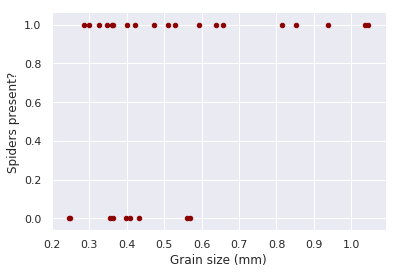

In [8]:
df.plot.scatter(x='Grain size (mm)', y='Spiders', c='DarkRed')
plt.ylabel('Spiders present?')
sns.despine()

'''df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],[6.4, 3.2, 1], [5.9, 3.0, 2]],
columns=['length', 'width', 'species'])
ax1 = df.plot.scatter(x='length', y='width', c='DarkBlue')'''




In [9]:
import sklearn.linear_model


scikit-learn has a logisitic regression classifier which uses regularization. To eliminate regularization, we set the regularization parameter C to $10^{12}$.


In [10]:
# C=1e12 is effectively no regularization - see https://github.com/scikit-learn/scikit-learn/issues/6738
clf = sklearn.linear_model.LogisticRegression(C=1e12, random_state=0)
clf.fit(df['Grain size (mm)'].reshape(-1, 1), df['Spiders'])
print(clf.intercept_, clf.coef_)

AttributeError: 'Series' object has no attribute 'reshape'

This is in agreement with the equation John reports:
$$
probability of spider presence = \frac{e^{-1.6476+5.1215(grain \; size)}}{(1+e^{-1.6476+5.1215(grain \; size)}}
$$

In [11]:
def plot_log_reg(x, y, data, clf, xmin=None, xmax=None, alpha=1, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure
    ax.scatter(data[x], data[y], color='black', zorder=20, alpha=alpha)
    if xmin is None:
        xmin = x.min()
    if xmax is None:
        xmax = x.max()
    X_test = np.linspace(xmin, xmax, 300)

    loss = scipy.special.expit(X_test * clf.coef_ + clf.intercept_).ravel()
    ax.plot(X_test, loss, linewidth=3)

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    fig.tight_layout()
    sns.despine()
    return fig, ax


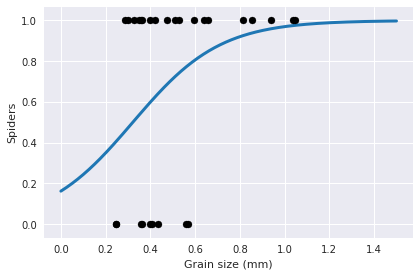

In [12]:
plot_log_reg(x='Grain size (mm)', y='Spiders', data=df, clf=clf, xmin=0, xmax=1.5);
